# Aprendizaje Supervisado: 

#### - Supervisado: Entrenamiento por medio de datos etiquetados.

#### - No Supervisados: Entrenamiento por medio de clasificacion y organizacion de datos ( Datos no etiquetados )

### Prepocesamiento de datos

In [25]:
# Librerias

import numpy as np
from sklearn import preprocessing

# Datos

input_data = np.array([[5.1, -2.9, 3.3],
                     [-1.2, 7.8, -6.1],
                     [3.9, 0.4, 2.1],
                     [7.3, -9.9, -4.5]])

#### Binarizacion:

In [26]:
# Binarizacion de "input_data" 

data_binarized = preprocessing.Binarizer(threshold=2.1).transform(input_data) # Threshold = Límite.
print("Binarized data:\n", data_binarized)

Binarized data:
 [[ 1.  0.  1.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]


#### Eliminación de la Media:

In [27]:
# Desviacion estandar y media.

print("Before:")
print("Mean =", input_data.mean(axis=0))
print("Std Deviation=", input_data.std(axis=0))

Before:
Mean = [ 3.775 -1.15  -1.3  ]
Std Deviation= [ 3.12039661  6.36651396  4.0620192 ]


In [28]:
# Eliminacion de la media.

deta_scaled = preprocessing.scale(input_data)
print("After:")
print("Mean =", deta_scaled.mean(axis=0))
print("Std Deviation", deta_scaled.std(axis=0))

After:
Mean = [  1.11022302e-16   0.00000000e+00   2.77555756e-17]
Std Deviation [ 1.  1.  1.]


#### Escalado:

In [29]:
# Las características de los valores varian en muchos valores aleatorios. Cuando se escala esos valores aleatorios se reducen.

# Escalado Minimo y Escalado Maximo.

data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0, 1)) # Parametro de escalado.
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data) # Variable a escalar

print("Datos escalados en un minimo y un maximo: \n", data_scaled_minmax)

Datos escalados en un minimo y un maximo: 
 [[ 0.74117647  0.39548023  1.        ]
 [ 0.          1.          0.        ]
 [ 0.6         0.5819209   0.87234043]
 [ 1.          0.          0.17021277]]


#### Normalización:

In [30]:
# Los vectores pueden ser medidos en una escala común. Existen dos:
# L1: Least Absolute Deviation (Minimos Errores Absolutos): La suma de valores absolutos debe ser 1 en cada fila.
# L2: Least Squares (Minimos Cuadrados): La suma de los cuadrados debe ser uno

# Normalizacón de nuestros datos: 

# L1

data_normalized_l1 = preprocessing.normalize(input_data, norm='l1')
print("\nDatos L1:", data_normalized_l1)

# L2

data_normalized_l2 = preprocessing.normalize(input_data, norm='l2')
print("\nDatos L2:", data_normalized_l2)


Datos L1: [[ 0.45132743 -0.25663717  0.2920354 ]
 [-0.0794702   0.51655629 -0.40397351]
 [ 0.609375    0.0625      0.328125  ]
 [ 0.33640553 -0.4562212  -0.20737327]]

Datos L2: [[ 0.75765788 -0.43082507  0.49024922]
 [-0.12030718  0.78199664 -0.61156148]
 [ 0.87690281  0.08993875  0.47217844]
 [ 0.55734935 -0.75585734 -0.34357152]]


#### Codificación de etiquetas:

In [31]:
# Datos de ejemplo.

input_labels = ['red', 'black', 'red', 'green', 'black', 'yellow', 'white']

# Codificador de etiquetas.

encoder = preprocessing.LabelEncoder()
encoder.fit(input_labels)

print('\nLabels mappings')
for i, item in enumerate(encoder.classes_):
    print(item, '-->', i)


Labels mappings
black --> 0
green --> 1
red --> 2
white --> 3
yellow --> 4


In [32]:
# Codificacion de datos:

test_labels = ['green', 'red', 'black']
encoded_values = encoder.transform(test_labels)
print('\nLabels =', test_labels)
print('Encoded values = ', list(encoded_values))


Labels = ['green', 'red', 'black']
Encoded values =  [1, 2, 0]


In [33]:
# Decodificación de datos:

encode_values = [3, 0, 4, 1]
decoded_list = encoder.inverse_transform(encoded_values)
print('\nEncoded values =', encoded_values)
print('Decoded labels=', list(decoded_list))


Encoded values = [1 2 0]
Decoded labels= ['green', 'red', 'black']


###### Utilities archive (utilities.py)

In [34]:
def visualize_classifier(classifier, X, y):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    
    print('\nMin X:', X[:, 0].min(), '- 1.0 =', min_x)
    print('\nMax X:', X[:, 0].max(), '+ 1.0 =', max_x)
    
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    
    print('\nMin Y:', X[:, 1].min(), '-1.0 =', min_y)
    print('\nMax Y:', X[:, 1].max(), '+1.0 =', max_y)

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))
          
    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()

#### Regresión logística:


Min X: 0.5 - 1.0 = -0.5

Max X: 6.0 + 1.0 = 7.0

Min Y: 0.4 -1.0 = -0.6

Max Y: 8.0 +1.0 = 9.0


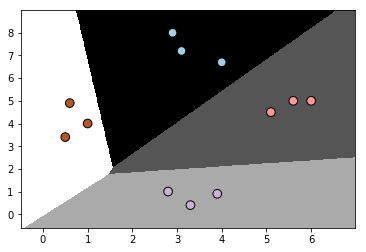

In [35]:
# Se usa para explicar la relación entre variables de entrada y salida

# Se necesita una funcion logistica para estimar la probabilidad y encontrar relaciones.

from sklearn import linear_model
import matplotlib.pyplot as plt

# Vectores bidimensionales.

X = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5], [6, 5], [5.6, 5], [3.3, 0.4], [3.9, 0.9], [2.8, 1], [0.5, 3.4], [1, 4], [0.6, 4.9]])

y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

# Clasificador de regresión logistica:

classifier = linear_model.LogisticRegression(solver='liblinear', C=1)

classifier.fit(X, y)
visualize_classifier(classifier, X, y)

In [36]:
# np.arange(rango_minimo, rango_maximo, intervalo)

np.arange(0, 1, .2)

array([ 0. ,  0.2,  0.4,  0.6,  0.8])

#### Naïve Bayes Classifier:

In [37]:
# Teorema de Bayes: P(A|B) = P(B|A)P(A)/P(B)

In [38]:
# Librerias

from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation

In [39]:
# Contenedor de Datos
input_file = 'data_multivar_nb.txt';

# Cargar Datos:
data = np.loadtxt(input_file, delimiter=',')
X, y= data[:, :-1], data[:, -1]

In [98]:
# Explicacion 'Slicing simple method'

test_data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# data[filas(rows) ,columnas( ) ]

# Filas

first_element_of_rows = test_data[:1, :] # Se usa el elemento de la primera fila.
first_element_of_rows_deleted = test_data[1: , :] # Se elimina la primera fila.

# Columnas

first_element_of_columns = test_data[:1, :] # Se usa el elemente de la primer acolumna
first_element_of_columns_deleted = test_data[:, 1:] # Se elimina la primera columna.

# Printing

print('##### Rows #####\n')
print('First Element of Rows \n', first_element_of_rows)
print('\nFirst Element of Rows Deleted \n', first_element_of_rows_deleted)

print('\n##### Columns #####')
print('\nFirst Element of Columns \n', first_element_of_columns)
print('\nFirst Element of Columns Deleted \n', first_element_of_columns_deleted)

print('\nTest')
print(first_element_of_rows_test)

##### Rows #####

First Element of Rows 
 [[1 2 3]]

First Element of Rows Deleted 
 [[4 5 6]
 [7 8 9]]

##### Columns #####

First Element of Columns 
 [[1 2 3]]

First Element of Columns Deleted 
 [[2 3]
 [5 6]
 [8 9]]

Test
[[7 8 9]]
